## HRM: Employee Attrition Edition
<hr>

<img src="../img/emergency-exit.jpg" alt="Drawing" style="width: 450px;"/>

<br>
Human resource management is discipline to describe the management and development of employees in the organization, this term is also known as people and talent management. However, HRM involves overseeing all activities related to managing an organization's human capital ranging from recruiting, compensation, training and retaining great employees.

Many organizations agree that __retaining talent is more cost effective than hiring__, however, retaining talent is not easy task and probably one of the most challenging issue within HR department and organization as a whole.

In this notebook, I will demonstrate how data science can help on identifying employee attrition. 

<br>

_Remark_: The data set is taken from [IBM website](https://www.ibm.com/communities/analytics/watson-analytics-blog/hr-employee-attrition/) and it is fictional data set.

<br>

__Notebook will consist of__:

* Basic data exploration
* Feature engineering
* Machine learning 
* How we can implement it 
* Final Thoughts and Summary


In [1]:
# Core python library
import os
import gc
import pandas as pd
import numpy as np
from numpy import median
import statsmodels.api as sm
pd.set_option('display.max_columns', 500)

# ignore the warning message
import warnings
warnings.filterwarnings('ignore')

# visualize related
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display, HTML
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

# check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor  

# Machine learning related
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, scorer
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve

# Visualize the tree model
import graphviz
import scikitplot as skplt

In [2]:
SEED = 1234
PATH = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()
os.chdir(PATH)  # Ensure we are in the desired working path
import myUtilityFunction

### Section 1: Data retrieval and Data Understanding

In [3]:
data_df = pd.read_csv('../data/WA_Fn-UseC_-HR-Employee-Attrition.csv')
myUtilityFunction.quick_df_explorer(data_df)

Number of observations: 1470, Number of columns / features: 35

The data types are {'int64': Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object'), 'object': Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')}

The statistic of each columns:



,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
display(data_df.head(5))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Several things we can check before doing some visualization on the features:

- Is there any unavailable data (or null) in the data set? 
- Is there any columns with singular values? 

I have built the function to do this, however, you can use `data_df.isnull().sum()` which will return the sum of null rows on each column.

In [5]:
print(data_df.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
myUtilityFunction.get_missing_values(data_df, return_missing_df_flag=True)

There are 0 columns that have missing values


,Missing Values,% of Total Values


After viewing the `describe()` from above, looks like there will be column with only __one single__ value. This doesn't provide any insight and predictive power, as such I will identify them and remove them.

In [7]:
one_uniq = dict()
for col in data_df.columns:
    if len(data_df[col].unique()) == 1:
        one_uniq.update({col: data_df[col].unique().tolist()})
        
print('The name of column(s) with single value: %s' % one_uniq)

The name of column(s) with single value: {'EmployeeCount': [1], 'Over18': ['Y'], 'StandardHours': [80]}


We have 3 columns with 1 single unique value, we can remove it from the data set.

In [8]:
data_df.drop(one_uniq.keys(), axis=1, inplace=True)

Another column is `EmployeeNumber`, which contains all different numbers. This can be assumed to be an ID column, which can be dropped.

In [9]:
data_df.drop('EmployeeNumber', axis=1, inplace=True)

There are 7 categorical columns, which have been encoded to numeric data. Converting this back for better intuition of the data.

In [10]:
education_map = {1: 'Below College', 2: 'College',
                 3: 'Bachelor', 4: 'Master', 5: 'Phd'}
envir_sat_map = {1: 'Low', 2: 'Medium',
                 3: 'High', 4: 'Very High'}
job_inv_map = {1: 'Low', 2: 'Medium',
               3: 'High', 4: 'Very High'}
job_sat_map = {1: 'Low', 2: 'Medium',
               3: 'High', 4: 'Very High'}
perf_rate_map = {1: 'Low', 2: 'Good',
                 3: 'Excellent', 4: 'Outstanding'}
relation_sat_map = {1: 'Low', 2: 'Medium',
                    3: 'High', 4: 'Very High'}
work_life_map = {1: 'Bad', 2: 'Good',
                 3: 'Better', 4: 'Best'}

data_df['Education'] = data_df['Education'].apply(lambda x: education_map[x])
data_df['EnvironmentSatisfaction'] = \
    data_df['EnvironmentSatisfaction'].apply(lambda x: envir_sat_map[x])
data_df['JobInvolvement'] = data_df['JobInvolvement'].apply(lambda x: job_inv_map[x])
data_df['JobSatisfaction'] = \
    data_df['JobSatisfaction'].apply(lambda x: job_sat_map[x])
data_df['PerformanceRating'] = data_df['PerformanceRating'].apply(lambda x: perf_rate_map[x])
data_df['RelationshipSatisfaction'] = \
    data_df['RelationshipSatisfaction'].apply(lambda x: relation_sat_map[x])
data_df['WorkLifeBalance'] = data_df['WorkLifeBalance'].apply(lambda x: work_life_map[x])

display(data_df.head(5))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,Medium,Female,94,High,2,Sales Executive,Very High,Single,5993,19479,8,Yes,11,Excellent,Low,0,8,0,Bad,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,High,Male,61,Medium,2,Research Scientist,Medium,Married,5130,24907,1,No,23,Outstanding,Very High,1,10,3,Better,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,Very High,Male,92,Medium,1,Laboratory Technician,High,Single,2090,2396,6,Yes,15,Excellent,Medium,0,7,3,Better,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,Very High,Female,56,High,1,Research Scientist,High,Married,2909,23159,1,Yes,11,Excellent,High,0,8,3,Better,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,Low,Male,40,High,1,Laboratory Technician,Medium,Married,3468,16632,9,No,12,Excellent,Very High,1,6,3,Better,2,2,2,2


### Section 2: Data Visualization

Despite `describe()` can provide the statistic of the data, we are trained to be better at looking and analyzing data visually. Hence, in this section, I will do EDA using both `univariate analysis` and `multi-variate analysis`.


##### Univariate Analysis


In [11]:
le_10_val_col = []
mt_10_val_col = []
obj_val_col = []
for col in data_df.columns:
    if (len(data_df[col].unique()) <= 10) & (data_df[col].dtypes == 'int64'):
        le_10_val_col.append(col)
    elif (len(data_df[col].unique()) > 10) & (data_df[col].dtypes == 'int64'):
        mt_10_val_col.append(col)
    elif data_df[col].dtypes == 'O':
        obj_val_col.append(col)
        

In [12]:
for i in obj_val_col:
    myUtilityFunction.plot_categorical(data_df, i)
    

In [13]:
for i in le_10_val_col:
    myUtilityFunction.plot_count_numpy(np.array(data_df.loc[:, i]), plot_name = 'Column: %s' % i)

To reduce the notebook workload, I will plot the rest of the data using `seaborn`.

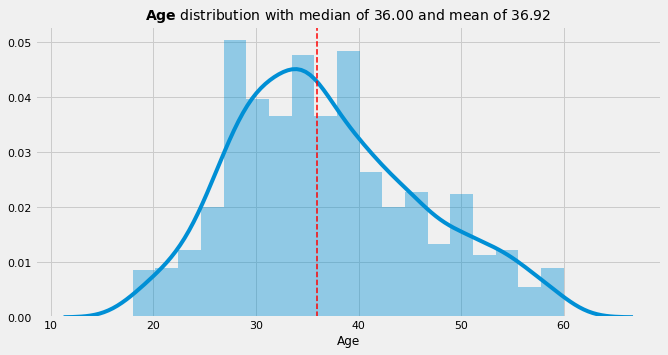

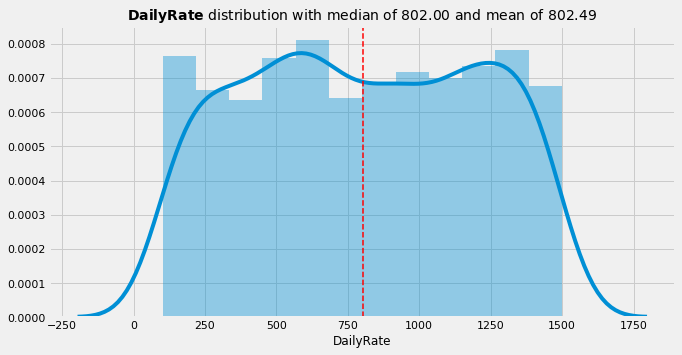

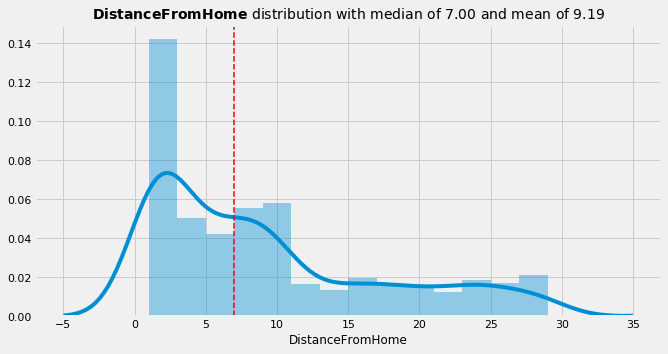

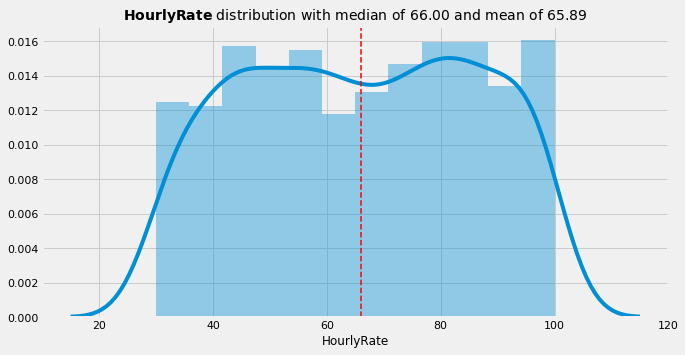

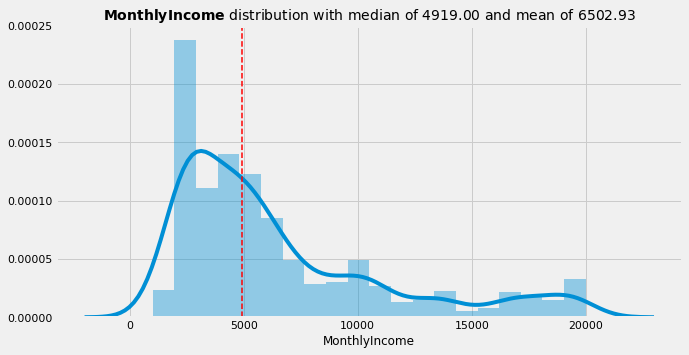

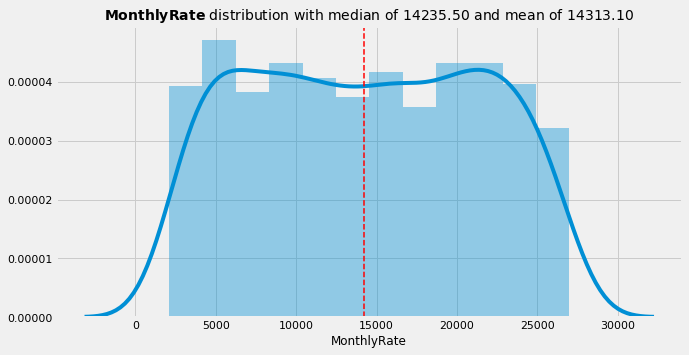

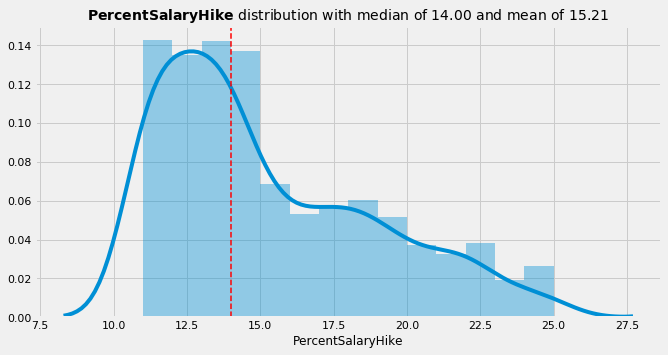

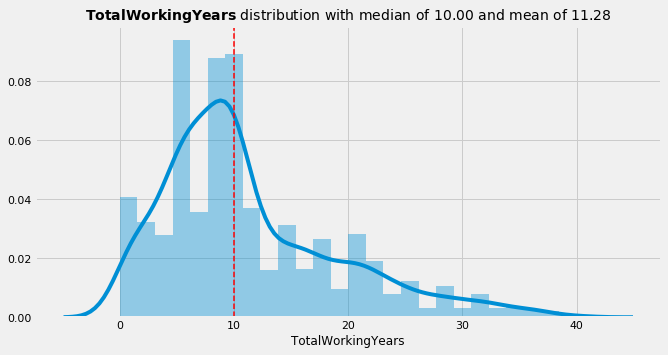

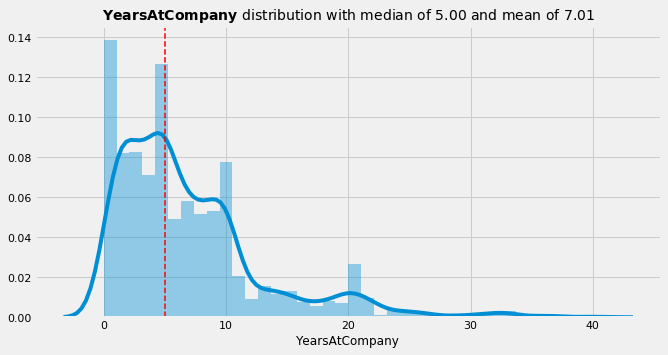

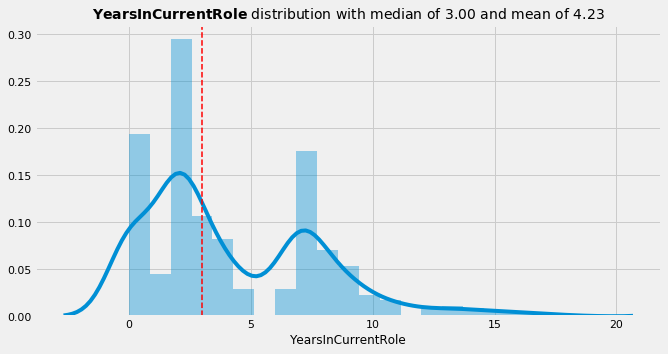

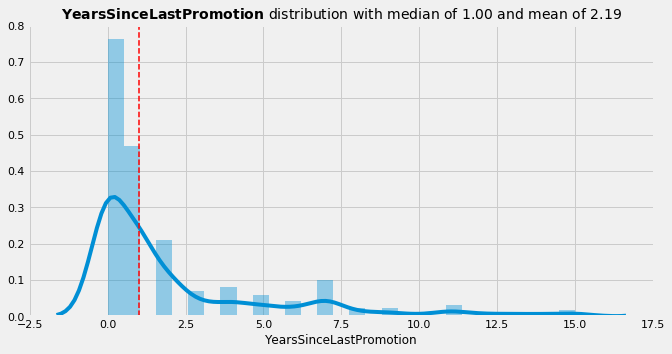

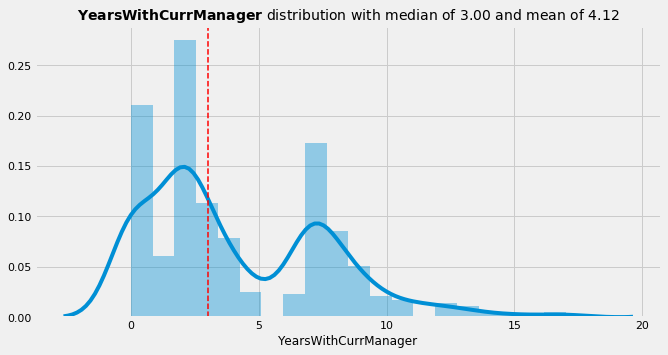

In [14]:
for i in mt_10_val_col:
    plt.figure(figsize=(10, 5))
    sns.distplot(data_df.loc[:, i], kde=True)
    plt.title(r'$\bf{%s}$ distribution with median of %.2f and mean of %.2f' % \
              (i, median(data_df.loc[:, i]), data_df.loc[:, i].mean()),
              size=14)
    plt.xlabel(i, fontsize=12)
    plt.xticks(fontsize=11)
    plt.yticks(fontsize=11)
    plt.axvline(median(data_df.loc[:, i]), 0, linestyle='--', 
                linewidth=1.5, color='r')
    plt.show()


##### multivariate analysis

When we're doing multivariate analysis, it is good to start with the questions and use the visualization to answer those questions. With this approach, we can get more insights and initial correlation of the data to target.

<br>

__Question 1__: Does job satisfaction impact the employee attrition?

Apparently, yes! The lower job satisfaction increases the chance of employees leaving the company.

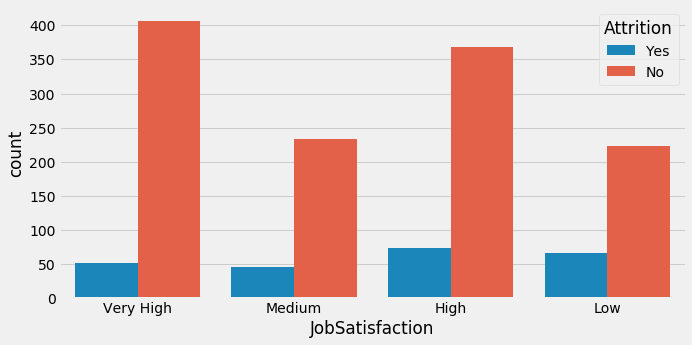

Attrition,No,Yes
JobSatisfaction,,
Low,0.771626,0.228374
Medium,0.835714,0.164286
High,0.834842,0.165158
Very High,0.886710,0.113290


In [15]:
plt.figure(figsize=(10, 5))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data_df)
plt.show();
pd.crosstab(data_df.JobSatisfaction, data_df.Attrition, 
            normalize='index').reindex(index=['Low', 'Medium', 'High', 'Very High'])

In [16]:
pd.crosstab([data_df.Department, data_df.JobSatisfaction], 
            [data_df.Attrition], 
            normalize='index').reindex(level=1, index=['Low', 'Medium', 'High', 'Very High'])

Attrition                                     No       Yes
Department             JobSatisfaction                    
Human Resources        Low              0.545455  0.454545
                       Medium           0.900000  0.100000
                       High             0.800000  0.200000
                       Very High        0.882353  0.117647
Research & Development Low              0.802083  0.197917
                       Medium           0.862069  0.137931
                       High             0.856667  0.143333
                       Very High        0.905085  0.094915
Sales                  Low              0.732558  0.267442
                       Medium           0.767442  0.232558
                       High             0.787402  0.212598
                       Very High        0.850340  0.149660

__Question 2__: Does the money impact the employee attrition?

Overall, the monthly income shows significant impact to employee attrition.

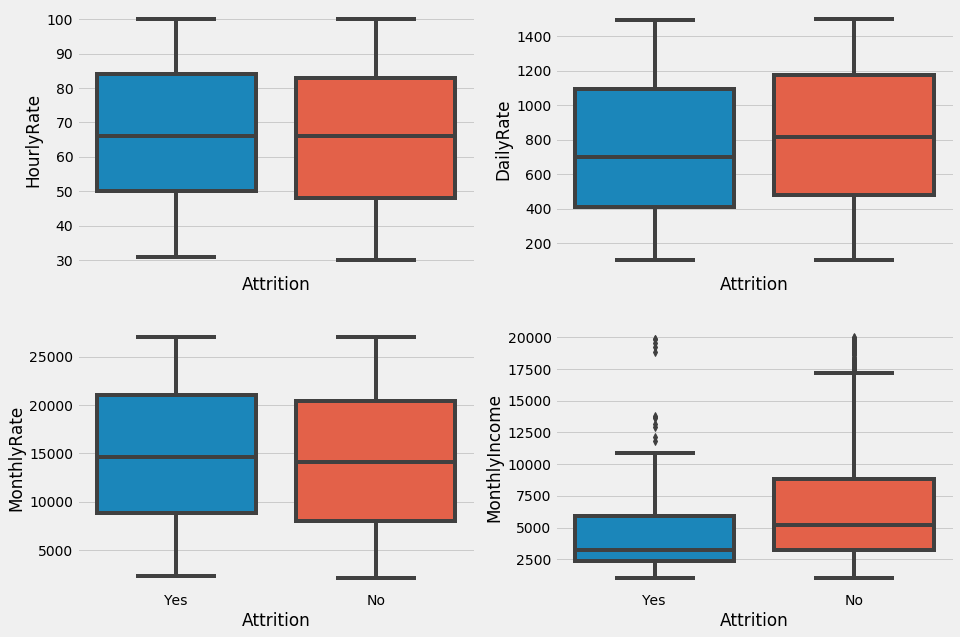

In [17]:
f, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True)
sns.boxplot(x='Attrition', y='HourlyRate', data=data_df, ax=axes[0][0])
sns.boxplot(x='Attrition', y='DailyRate', data=data_df, ax=axes[0][1])
sns.boxplot(x='Attrition', y='MonthlyRate',data=data_df, ax=axes[1][0])
sns.boxplot(x='Attrition', y='MonthlyIncome',data=data_df, ax=axes[1][1])
plt.show();

__Question 3__: What level of education has higher chance to leave the job?

- Look likes those who are not graduated from university are likely to leave.
- Phd employees seem not to look for a new role, this is properly they already have very high rank in the organization.

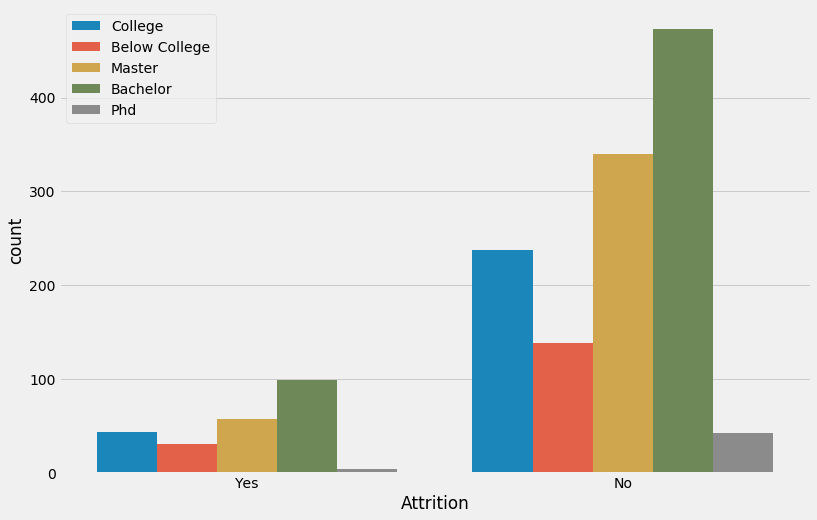

Attrition,No,Yes
Education,,
Below College,0.817647,0.182353
College,0.843972,0.156028
Bachelor,0.826923,0.173077
Master,0.854271,0.145729
Phd,0.895833,0.104167


In [18]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Attrition', hue='Education', data=data_df)
plt.legend(loc='best')
plt.show()
pd.crosstab(data_df.Education, 
            data_df.Attrition, 
            normalize='index').reindex(index=['Below College', 'College', 'Bachelor', 'Master', 'Phd'])

In [19]:
_tmp_phd = data_df[data_df.Education == 'Phd']

pd.crosstab([_tmp_phd.Department, _tmp_phd.JobRole], 
            _tmp_phd.Attrition, margins=True)


Attrition                                         No  Yes  All
Department             JobRole                                
Human Resources        Human Resources             2    1    3
Research & Development Healthcare Representative   3    0    3
                       Laboratory Technician       5    0    5
                       Manager                     2    0    2
                       Manufacturing Director      3    2    5
                       Research Director           7    0    7
                       Research Scientist          7    1    8
Sales                  Manager                     3    0    3
                       Sales Executive            11    1   12
All                                               43    5   48

__Question 4__: Does work life balance influence the employee attrition?

- Look likes __DistanceFromHome__ with __WorkLifeBalance__ can impact the employee attrition.
- __Over time__ is one of the key which influences the employee attrition.

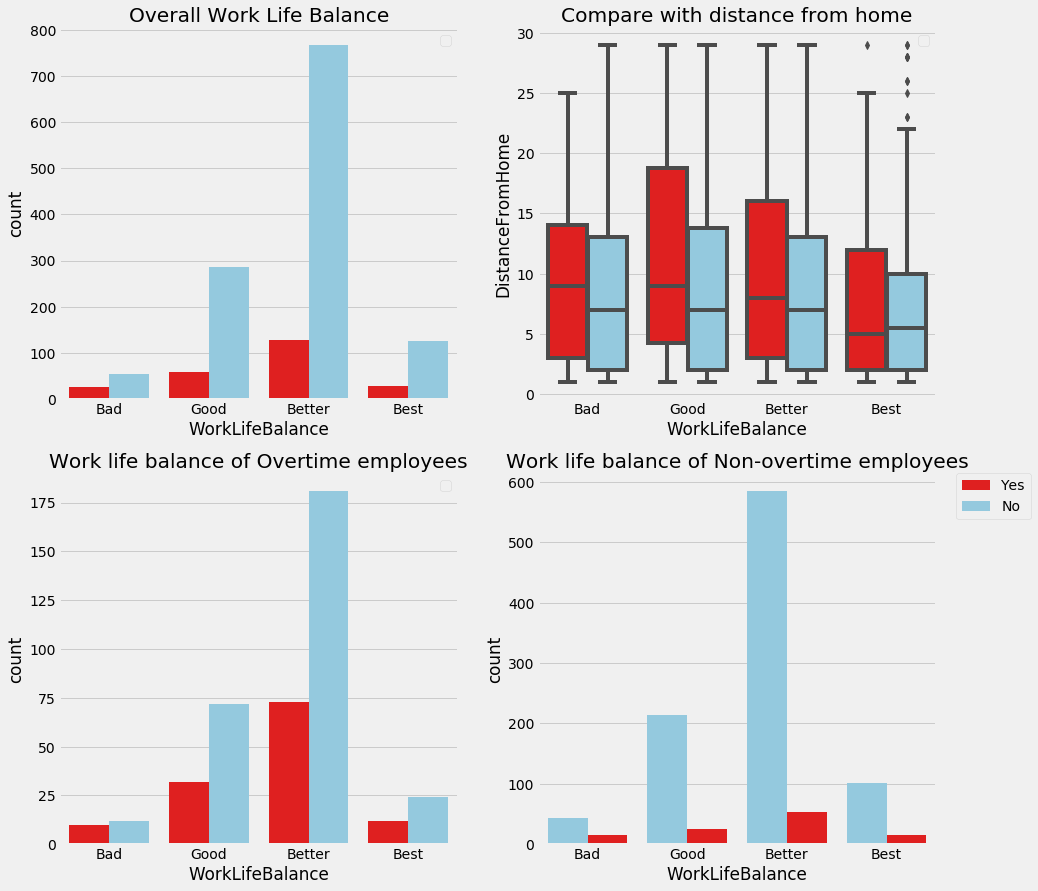

In [20]:
_tmp_order = ['Bad', 'Good', 'Better', 'Best']

f, axes = plt.subplots(2, 2, figsize=(14, 14))
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=data_df, order=_tmp_order, ax=axes[0][0])
axes[0][0].set_title('Overall Work Life Balance')
sns.boxplot(x='WorkLifeBalance', y='DistanceFromHome', hue='Attrition', 
            palette={'Yes': 'r', 'No': 'skyblue'},
            data=data_df, order=_tmp_order, ax=axes[0][1])
axes[0][1].set_title('Compare with distance from home')
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=data_df[data_df.OverTime == 'Yes'],
              order=_tmp_order, ax=axes[1][0])
axes[1][0].set_title('Work life balance of Overtime employees')
sns.countplot(x='WorkLifeBalance', hue='Attrition', palette={'Yes': 'r', 'No': 'skyblue'},
              data=data_df[data_df.OverTime != 'Yes'],
              order=_tmp_order, ax=axes[1][1])
axes[1][1].set_title('Work life balance of Non-overtime employees')
handles, labels = axes[0][0].get_legend_handles_labels()
axes[0, 0].legend(handles[:0], labels[:0])
axes[0, 1].legend(handles[:0], labels[:0])
axes[1, 0].legend(handles[:0], labels[:0])
axes[1, 1].legend(handles[:0], labels[:0])
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show();

Hopefully, you will have the intuition on the data and the factors which impact the employee attrition.

<br>

To end this section, the correlation heatmap will be provided using all numerical features.

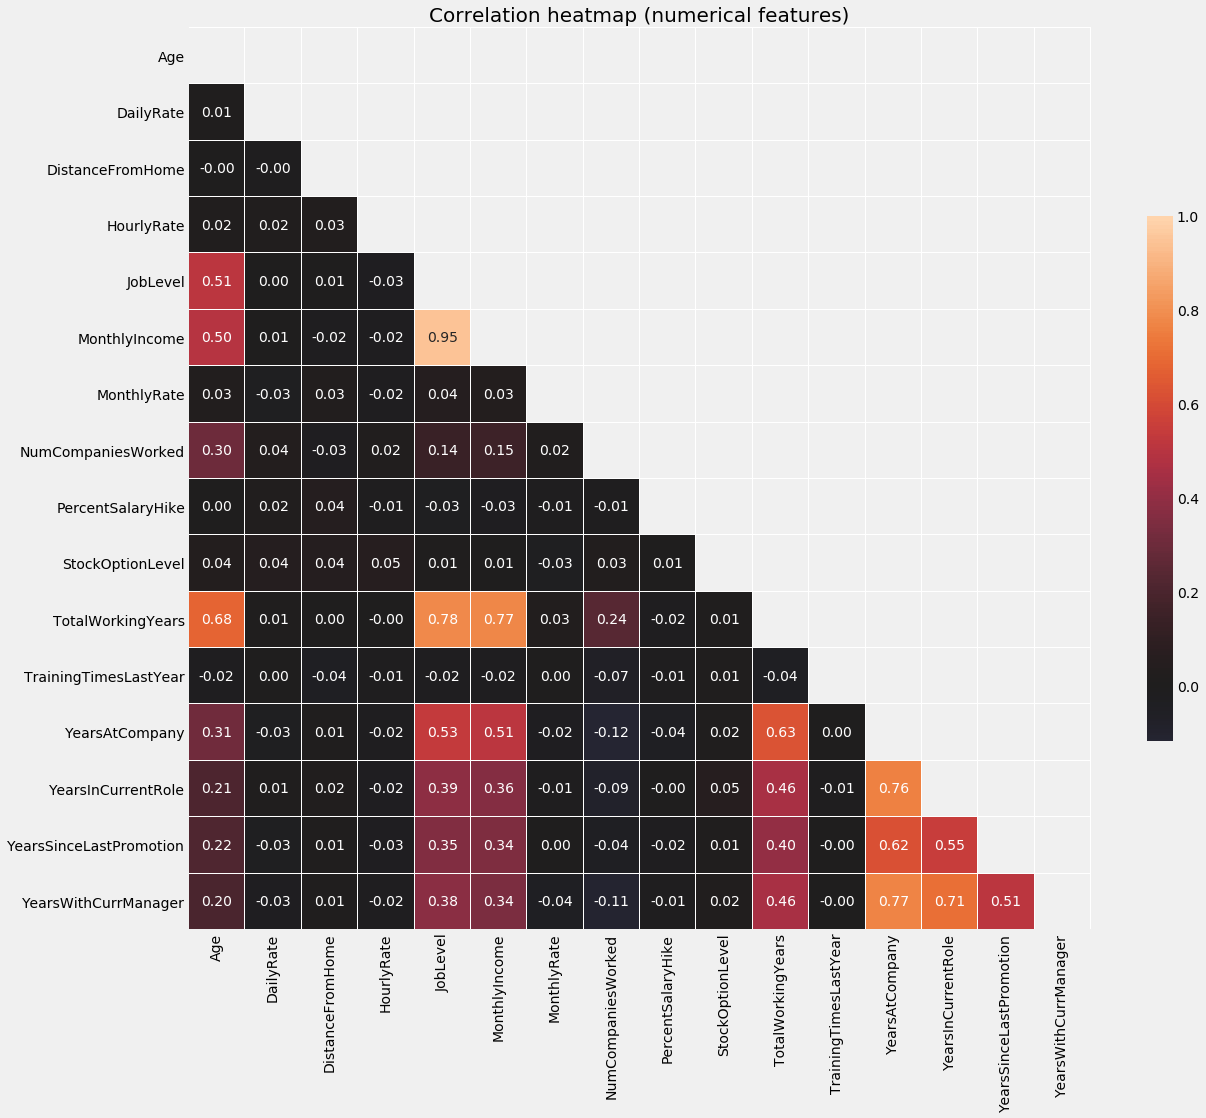

In [21]:
f,ax = plt.subplots(figsize=(18, 18))
corr = data_df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, linewidths=.1, fmt= '.2f',ax=ax,
            center=0, square=True, cbar_kws={'shrink': .5}
           )
plt.title('Correlation heatmap (numerical features)', size=20)
plt.show();

#### Section 2: Feature Engineering

This process is very important in building the model. It is the process of applying __domain knowledge__ of the data to create new features.

<br>

However, before doing feature engineering, I will split the data set into training and testing. This is to stimulate what the real world data flow will be as the feature engineering are not part of the initial data.

Several feature engineering and transformation will include:

- Create __Generation__ feature
- Create __Job hopper__ feature
- Create __Compa-ratio__ feature
- One hot encoding for categorical features

In [22]:
X = data_df.loc[:, data_df.columns != 'Attrition']
y = data_df.loc[:, 'Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state=SEED)
print("Training data set shape: %s\nTesting data set shape: %s" % (X_train.shape, X_test.shape))

Training data set shape: (1176, 30)
Testing data set shape: (294, 30)


Convert the target variable mapping to _numerical_ value.

In [23]:
target_map = {'Yes': 1, 'No': 0}
y_train = y_train.apply(lambda x: target_map[x])
y_test = y_test.apply(lambda x: target_map[x])

In [24]:
print('Distribution of training:\n%s' % y_train.value_counts())
print('\n')
print('Distribution of testing:\n%s' % y_test.value_counts())

Distribution of training:
0    986
1    190
Name: Attrition, dtype: int64


Distribution of testing:
0    247
1     47
Name: Attrition, dtype: int64


__Feature Engineering Function__

In [25]:
def create_generation_feature(age_val: int) -> str:
    """
    Function to convert age value onto generation string
    @Args:
      age_val (int): the age value from data frame
      
    Return:
      String output specifies the generation 
    """
    out = ''
    if age_val < 37:
        out = 'Millenials'
        
    elif age_val < 54:
        out = 'Generation X'
        
    elif age_val < 73:
        out = 'Boomers'
        
    else:
        out = 'Silent'
        
    return out


def create_job_hop_index(df: pd.DataFrame, total_exp_col: str, 
                         num_prev_com_col: str) -> (int, float):
    """
    Function to compute the job hopper index and identify the first job or not
    @Args:
      df (pd.DataFrame): pandas data frame
      total_exp_col (str): the name of the column containing total experience
      num_prev_com_col (str): the name of the column containing numbers of previous companies worked
    
    Return:
      The job hopper index
    """
    first_job_ind = np.where(df[num_prev_com_col] == 0, 1, 0)
    job_hop_idx = np.where(df[num_prev_com_col] == 0, 
                           0.,
                           df[total_exp_col] / df[num_prev_com_col]
                          )
    
    return first_job_ind, job_hop_idx



The compa-ratio is normally computed by each employee's salary divided by median salary. However, this data set is fictional, so I will skip the process to compute this.

In [26]:
_LOOKUP_COL = ['Department', 'JobRole', 'JobLevel']
_MEDIAN_INCOME_LOOKUP = data_df.groupby(_LOOKUP_COL). \
    agg({'MonthlyIncome': np.median, 'Age': 'count'}).reset_index(drop=False). \
    rename(columns={'MonthlyIncome': 'MedianIncome', 'Age': 'Count'})

In [27]:
def compute_compa_ratio_feature(df: pd.DataFrame, salary_col: str,
                                lookup_df: pd.DataFrame=_MEDIAN_INCOME_LOOKUP, 
                                col_lookup_list: list=_LOOKUP_COL):
    """
    Function to compute the compa-ratio of each employee.
      This is computed by each employee divided by the median salary of the industry
    @Args:
      df: pandas data frame with monthly salary of each employee
      salary_col: a name of pandas data frame storing income
      lookup_df: pandas data frame stored the median of salary
      col_lookup_list: A list of column names
      
    Return:
      pandas data frame
    """
    merge_df = df.reset_index().merge(_MEDIAN_INCOME_LOOKUP, 
                                      on=_LOOKUP_COL,
                                      how="left").set_index('index')
    merge_df['compa_ratio'] = merge_df[salary_col] / merge_df['MedianIncome']
    merge_df.drop(['MedianIncome', 'Count'], axis=1, inplace=True)
    return merge_df

In [28]:
# Train data
X_train['Generation'] = X_train.Age.apply(lambda x: create_generation_feature(x))
X_train['First_job_ind'], X_train['Job_hop_idx'] = create_job_hop_index(X_train, 
                                                                        'TotalWorkingYears',
                                                                        'NumCompaniesWorked'
                                                                       )
X_train = compute_compa_ratio_feature(X_train, 'MonthlyIncome')
X_train.drop(['Age', 'TotalWorkingYears', 'NumCompaniesWorked'], axis=1, inplace=True)

# Test datada
X_test['Generation'] = X_test.Age.apply(lambda x: create_generation_feature(x))
X_test['First_job_ind'], X_test['Job_hop_idx'] = create_job_hop_index(X_test, 
                                                                      'TotalWorkingYears',
                                                                      'NumCompaniesWorked'
                                                                     )
X_test = compute_compa_ratio_feature(X_test, 'MonthlyIncome')
X_test.drop(['Age', 'TotalWorkingYears', 'NumCompaniesWorked'], axis=1, inplace=True)

One hot encoding all the __object__ variables.

In [29]:
obj_val_col = []
le_10_val_col = []
mt_10_val_col = []
for col in X_train.columns:
    if (len(X_train[col].unique()) <= 10) & (X_train[col].dtypes == 'int64'):
        le_10_val_col.append(col)
    elif (len(X_train[col].unique()) > 10) & (X_train[col].dtypes == 'int64'):
        mt_10_val_col.append(col)
    elif X_train[col].dtypes == 'O':
        obj_val_col.append(col)

print('The object columns:\n%s' % obj_val_col)
print('\n\n')
num_val_col = X_train.columns.difference(obj_val_col)
print('The numerical columns:\n%s' % num_val_col)

The object columns:
['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'Generation']



The numerical columns:
Index(['DailyRate', 'DistanceFromHome', 'First_job_ind', 'HourlyRate',
       'JobLevel', 'Job_hop_idx', 'MonthlyIncome', 'MonthlyRate',
       'PercentSalaryHike', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'compa_ratio'],
      dtype='object')


In [30]:
def encoding_feature(df, 
                     object_col_list: list=obj_val_col, numeric_col_list: list=num_val_col,
                     sample_ind: bool=False):
    """
    Function to do one-hot encoding for all categorical features and produce data frame for modeling
    @Args:
      df: predictors panda data frame
      object_col_list: the list containing the name of object columns
      numeric_col_list: the list containing the name of numeric columns
      sample_ind: the boolean to display sample head records; default is False
      
    Return:
      final predictor pandas data frame
    """
    categorical_df = pd.DataFrame()
    for i in object_col_list:
        tmp_ = pd.get_dummies(data=df.loc[:, i], 
                              columns=i,
                              prefix=i,
                              drop_first=True
                             )
        categorical_df = pd.concat([categorical_df, tmp_], axis=1)
    
    out_df = pd.concat([df.loc[:, numeric_col_list], categorical_df], axis=1)
    if sample_ind:
        display(out_df.head(5))
        
    return out_df

X_train = encoding_feature(X_train, sample_ind=True)
X_test = encoding_feature(X_test, sample_ind=True)

,DailyRate,DistanceFromHome,First_job_ind,HourlyRate,JobLevel,Job_hop_idx,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,compa_ratio,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Master,Education_Phd,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Generation_Generation X,Generation_Millenials
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
630,1230,1,0,33,2,0.666667,4775,19146,22,2,2,2,2,2,2,0.904356,0,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1
1221,1238,1,0,74,3,8.333333,10748,3395,23,1,3,23,15,14,4,1.090725,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0
122,441,14,0,72,1,0.777778,4963,4510,18,3,2,5,4,4,3,1.842242,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0
706,1479,24,0,100,4,5.500000,13194,17071,16,0,2,1,0,0,0,0.994086,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,0
87,432,9,0,96,1,3.333333,2075,18725,23,2,4,4,2,0,3,0.770946,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0


,DailyRate,DistanceFromHome,First_job_ind,HourlyRate,JobLevel,Job_hop_idx,MonthlyIncome,MonthlyRate,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,compa_ratio,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,Education_Below College,Education_College,Education_Master,Education_Phd,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_Low,EnvironmentSatisfaction_Medium,EnvironmentSatisfaction_Very High,Gender_Male,JobInvolvement_Low,JobInvolvement_Medium,JobInvolvement_Very High,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_Low,JobSatisfaction_Medium,JobSatisfaction_Very High,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,PerformanceRating_Outstanding,RelationshipSatisfaction_Low,RelationshipSatisfaction_Medium,RelationshipSatisfaction_Very High,WorkLifeBalance_Best,WorkLifeBalance_Better,WorkLifeBalance_Good,Generation_Generation X,Generation_Millenials
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
520,817,2,0,56,2,4.000000,8120,18597,12,0,3,2,2,2,2,1.488816,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0
286,920,24,0,43,1,6.333333,3161,19920,22,1,0,1,0,0,0,1.174438,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0
347,1309,4,0,99,2,1.666667,2976,25751,19,0,3,0,0,0,0,0.840678,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
1245,897,10,1,59,1,0.000000,2145,2097,14,1,2,2,2,2,1,0.795623,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1
1153,544,3,0,70,1,0.000000,1569,18420,12,0,2,0,0,0,0,0.614571,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1


Now the feature transformation and engineering are completed. Let's check the correlation matrix as our final process.

In [31]:
def plot_correlation_matrix(predictor_df: pd.DataFrame, target_label: pd.Series):
    corr = pd.concat([predictor_df, target_label], axis=1).corr()
    matrix_cols = corr.columns.tolist()
    corr_array = np.array(corr)
    trace = go.Heatmap(x=matrix_cols,
                       y=matrix_cols,
                       z=corr_array,
                       colorscale='Viridis',
                       colorbar=dict()
                      )
    
    layout = go.Layout(dict(title='Correlation Matrix',
                            autosize=False,
                            height=900,
                            width=900,
                            margin=dict(r=0, l=210,
                                        t=25, b=210
                                       ),
                            xaxis=dict(tickfont=dict(size=9)),
                            yaxis=dict(tickfont=dict(size=9))
                           )
                      )
    fig = go.Figure(data=[trace], layout=layout)
    py.iplot(fig)
    
    
plot_correlation_matrix(X_train, y_train)

Look like we have a good correlation values. However, our features may have some multicollinearity. So let's check by using __VIF__ (Variance Inflation Factor). VIF is measure of colinearity among predictor variables within a multiple regression. It calculates by taking the ratio of the variances of all give model's betas divide by the variances of a single beta if it were fit alone.

In [32]:
def calculate_vif_(df: pd.DataFrame, 
                   thresh: float=5.0, print_remain_ind: bool=False):
    variables = list(range(df.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(df.iloc[:, variables].values, ix)
               for ix in range(df.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            del variables[maxloc]
            dropped = True

    remain_cols = df.columns[variables]
    if print_remain_ind:
        print('Remaining variables:\n%s' % remain_cols)
    
    return remain_cols

vif_cols_ = calculate_vif_(X_train, thresh=7., print_remain_ind=True)

Remaining variables:
Index(['DailyRate', 'DistanceFromHome', 'First_job_ind', 'Job_hop_idx',
       'MonthlyRate', 'StockOptionLevel', 'TrainingTimesLastYear',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'Education_Below College',
       'Education_College', 'Education_Master', 'Education_Phd',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High', 'Gender_Male',
       'JobInvolvement_Low', 'JobInvolvement_Medium',
       'JobInvolvement_Very High', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'JobSatisfaction_Lo

Another common approach is to use correlation values from `corr()` to remove highly correlated variables.

In [33]:
def get_remain_columns_using_corr(predictors_df: pd.DataFrame,
                                  thresh: float=0.8):
    """
    Function to provide the column list which excluded highly correlated variables
    """
    corr_matrix = predictors_df.corr().abs()
    upper_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop_cols = [column for column in upper_matrix.columns if any(upper_matrix[column] > thresh)]
    print('There are %d columns to remove: %s' % (len(to_drop_cols), to_drop_cols))
    remain_cols = upper_matrix.columns.difference(to_drop_cols)
    print('\nRemaining columns: %s' % remain_cols)
    return remain_cols

corr_cols_ = get_remain_columns_using_corr(X_train, thresh=.8)

There are 4 columns to remove: ['MonthlyIncome', 'Department_Sales', 'JobRole_Sales Executive', 'Generation_Millenials']

Remaining columns: Index(['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'DailyRate', 'Department_Research & Development', 'DistanceFromHome',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Education_Below College',
       'Education_College', 'Education_Master', 'Education_Phd',
       'EnvironmentSatisfaction_Low', 'EnvironmentSatisfaction_Medium',
       'EnvironmentSatisfaction_Very High', 'First_job_ind', 'Gender_Male',
       'Generation_Generation X', 'HourlyRate', 'JobInvolvement_Low',
       'JobInvolvement_Medium', 'JobInvolvement_Very High', 'JobLevel',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Directo

Different approaches yield different results. I will test these column sets separately.

#### Section 3: Machine learning

The target data we have is quite imbalanced (ratio around 0.84: 0.16)

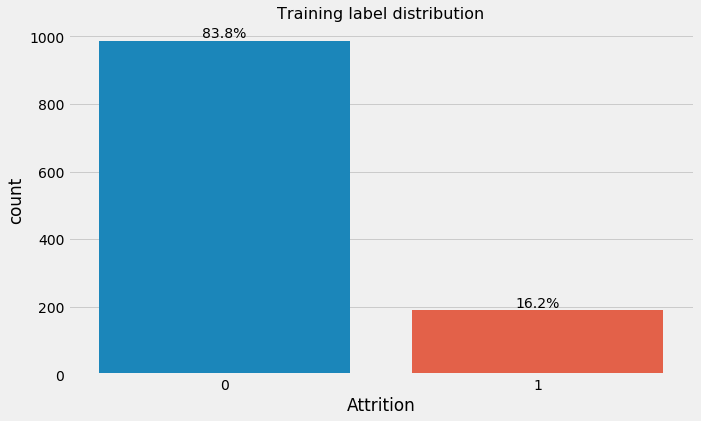

In [34]:
plt.figure(figsize=(10, 6))
total_ = float(len(y_train))
ax = sns.countplot(y_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 10,
            '{0:1.1%}'.format(height / total_),
            ha='center')
plt.title('Training label distribution', fontsize=16)
plt.show();

In [35]:
X_train_vif = X_train.loc[:, vif_cols_]
X_train_cor = X_train.loc[:, corr_cols_]
X_test_vif = X_test.loc[:, vif_cols_]
X_test_cor = X_test.loc[:, corr_cols_]

When we are dealing with different problem statement, we need to ensure we are choosing the right metric to measure the model performance. Below paragraph will provide some basic intuition on other performance other than _accuracy_.

__Introduction confusion matrix and other metrics to measure the model__
<hr>
<img src="../img/confusion-matrix.png" alt="Drawing" style="width: 300px;"/>

<br>

___Recall___: How many of the __churn employees__ in the test data set, were we able to identify correctly as _churn_ employee

___Precision___: How many of model's predicted as churn employees are __actually left__

___F1-Score___: Harmonic mean of recall and precision values

\begin{equation*}
F_1 =  2 * \frac{precision*recall}{precision+recall}
\end{equation*}

__Decision Tree__

- Supervised learning method can be used for classification and regression.
- It builds in the form of a tree structure, breaks down the data set into smaller and smaller subsets while at the same time an associated decision tree is developed.
- It is the most basic form of machine learning algorithm from tree-based algorithm.

In [36]:
tree_clf = tree.DecisionTreeClassifier(random_state=SEED, max_depth=3)
_ = myUtilityFunction.prediction_evaluation(tree_clf, X_train, X_test, 
                                            y_train, y_test, X_train.columns, 
                                            'features')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

Classification report: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.50      0.11      0.18        47

   micro avg       0.84      0.84      0.84       294
   macro avg       0.68      0.54      0.54       294
weighted avg       0.80      0.84      0.79       294


Accuracy Score:  0.8401
F1 Score:  0.1754
Area Under Curve:  0.5431 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



Let's demonstrate the decision tree and save it to the file.

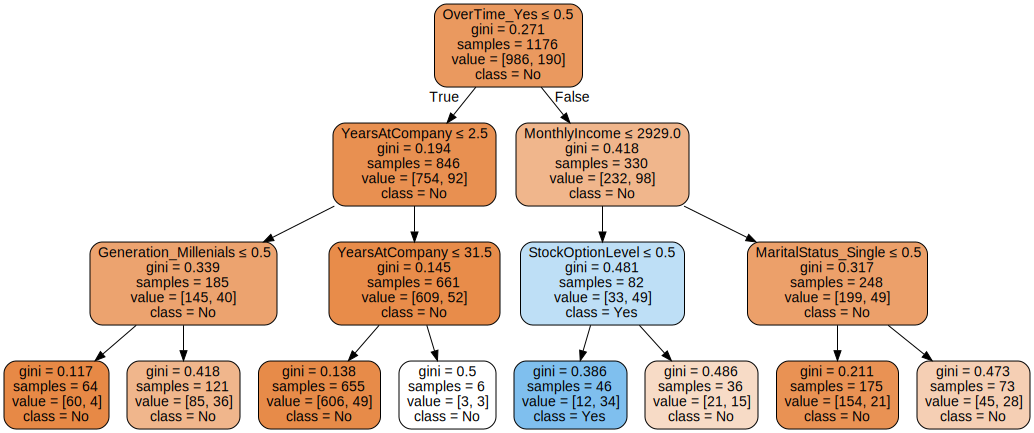

In [37]:
dot_data = tree.export_graphviz(tree_clf, out_file=None, 
                                feature_names=X_train.columns,  
                                class_names=['No', 'Yes'],  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format = 'png'
graph.render('../img/output/model_decision tree_employee attrition', view=False)
graph

__Random Forest__

- It is the prime example of ensemble machine learning method of the tree-based algorithm.
- It is created by ensembling various decision trees to produce a more __generalized model__, this technique is called __bagging__.

<img src="../img/random-forest.png" alt="Drawing" style="width: 600px;"/>


In [38]:
rf_clf = RandomForestClassifier(n_estimators=100,
                                max_depth=3,
                                random_state=SEED
                               )

_ = myUtilityFunction.prediction_evaluation(rf_clf, X_train, X_test, 
                                            y_train, y_test, X_train.columns, 'features')

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False)

Classification report: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

   micro avg       0.84      0.84      0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294


Accuracy Score:  0.8401
F1 Score:  0.0
Area Under Curve:  0.5 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



__XGBoost__

- So called 'one of the best' algorithms by utilizing __boosting__ technique, instead of bagging.
- Works by combining several sequential learners where the performance of each _weak learner_ is boosted in the next step.

![xgboost](../img/xgboost.png)

In [39]:
xgb_clf = xgboost.XGBClassifier(random_state=SEED, n_jobs=-1, learning_rate=0.1,
                                max_depth=3, n_estimators=100)
_ = myUtilityFunction.prediction_evaluation(xgb_clf, X_train, X_test, 
                                            y_train, y_test, X_train.columns, "features")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       247
           1       0.70      0.34      0.46        47

   micro avg       0.87      0.87      0.87       294
   macro avg       0.79      0.66      0.69       294
weighted avg       0.86      0.87      0.85       294


Accuracy Score:  0.8707
F1 Score:  0.4571
Area Under Curve:  0.656 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



In [40]:
_ = myUtilityFunction.prediction_evaluation(xgb_clf, X_train_vif, X_test_vif, 
                                            y_train, y_test, X_train_vif.columns, "features")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       247
           1       0.74      0.36      0.49        47

   micro avg       0.88      0.88      0.88       294
   macro avg       0.81      0.67      0.71       294
weighted avg       0.87      0.88      0.86       294


Accuracy Score:  0.8776
F1 Score:  0.4857
Area Under Curve:  0.6687 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



In [41]:
_ = myUtilityFunction.prediction_evaluation(xgb_clf, X_train_cor, X_test_cor, 
                                            y_train, y_test, X_train_cor.columns, "features")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=1234, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       247
           1       0.82      0.30      0.44        47

   micro avg       0.88      0.88      0.88       294
   macro avg       0.85      0.64      0.68       294
weighted avg       0.87      0.88      0.85       294


Accuracy Score:  0.8776
F1 Score:  0.4375
Area Under Curve:  0.6429 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



__How can we optimize the hyperparameters for machine learning algorithm?__

In [42]:
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgboost.XGBClassifier(random_state=SEED, n_jobs=-1)
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.05, 0.1, 0.15],
          'min_child_weight': [1, 2, 3, 5, 10],
          'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 1],
          'subsample': [0.6, 0.7, 0.8],
          'colsample_bytree': [0.6, 0.7, 0.8],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
random_search = RandomizedSearchCV(xgb_clf, param_distributions=params, 
                                   n_iter=param_comb, scoring='f1', 
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)

random_search.fit(X_train, y_train)
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best accuracy for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ )
print('\n Best hyperparameters:')
print(random_search.best_params_)

Fitting 5 folds for each of 800 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 496 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2032 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 3856 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:  7.3min finished



 All results:
{'mean_fit_time': array([1.50148005, 1.13733072, 1.49220881, 0.44341321, 1.26392355,
       0.79457817, 1.3427103 , 0.42187138, 0.88164215, 1.05218582,
       0.99114885, 0.57745581, 0.59879751, 0.94088326, 0.31874719,
       0.23078218, 0.54534106, 1.03534122, 0.57307363, 1.16309514,
       0.28743129, 1.30411191, 0.52619247, 0.99653454, 1.38729014,
       0.26309614, 1.46268768, 1.11552038, 1.12928638, 1.07991171,
       0.39614029, 0.24634099, 0.23596892, 0.22021074, 0.45039558,
       0.25152688, 0.96581655, 1.80357633, 1.09527044, 0.30957184,
       0.33211164, 0.23716536, 0.54195027, 0.81940832, 0.91575122,
       0.44820132, 0.88772721, 0.27905231, 0.4195848 , 0.33460684,
       1.53130493, 1.25923238, 0.87904925, 0.62832541, 0.36522813,
       0.44640446, 0.50265527, 1.32306137, 0.91874323, 0.65405087,
       1.07253175, 0.28463883, 0.40431862, 0.45817423, 1.90472159,
       0.89122477, 0.69194913, 0.55112638, 0.25950618, 0.5379612 ,
       1.2047781 , 0.94567094

In [43]:
_ = myUtilityFunction.prediction_evaluation(random_search.best_estimator_, X_train, X_test, 
                                            y_train, y_test, 
                                            X_train.columns, "features")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.3, learning_rate=0.15,
       max_delta_step=0, max_depth=3, min_child_weight=10, missing=None,
       n_estimators=200, n_jobs=-1, nthread=None,
       objective='binary:logistic', random_state=1234, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.7)

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       247
           1       0.61      0.43      0.50        47

   micro avg       0.86      0.86      0.86       294
   macro avg       0.75      0.69      0.71       294
weighted avg       0.85      0.86      0.85       294


Accuracy Score:  0.8639
F1 Score:  0.5
Area Under Curve:  0.6865 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



__Logistic Regression__

- One of the simplest form of machine learning algorithm, and is an alternative method to use other than the __linear regression__.
- It does not look at the relationship between variables as a straight line. It uses the _natural logarithm_ function to find the relationship between variables.
- Function then uses the coefficients in the logistic function.

In [46]:
log_clf = LogisticRegression(random_state=SEED)
_ = myUtilityFunction.prediction_evaluation(log_clf, X_train, X_test, y_train, y_test, 
                                            X_train.columns, "coefficients")

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=1234, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.69      0.47      0.56        47

   micro avg       0.88      0.88      0.88       294
   macro avg       0.80      0.71      0.74       294
weighted avg       0.87      0.88      0.87       294


Accuracy Score:  0.881
F1 Score:  0.557
Area Under Curve:  0.7138 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



Let's do `GridSearchCV` on our 3 sets of predictors

1. All predictors 
2. Predictors using `VIF`
3. Predictors using `corr()`

In [47]:
cv_params = {'C': [0.001, 0.01, 0.1, 1., 10., 100.], 
             'penalty': ['l1', 'l2'],
             'class_weight': [None, 'balanced']
            }   
fix_params = {'random_state': SEED}
log_cv_1 = GridSearchCV(LogisticRegression(**fix_params), cv_params, scoring='f1', cv=5)
log_cv_1.fit(X_train, y_train)
log_clf_all = LogisticRegression(**{**fix_params, **log_cv_1.best_params_})
_ = myUtilityFunction.prediction_evaluation(log_clf_all, X_train, X_test, y_train, y_test, 
                                            X_train.columns, "coefficients")

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1234, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       247
           1       0.71      0.57      0.64        47

   micro avg       0.89      0.89      0.89       294
   macro avg       0.82      0.76      0.79       294
weighted avg       0.89      0.89      0.89       294


Accuracy Score:  0.8946
F1 Score:  0.6353
Area Under Curve:  0.765 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



In [48]:
cv_params = {'C': [0.001, 0.01, 0.1, 1., 10., 100.], 
             'penalty': ['l1', 'l2'],
             'class_weight': [None, 'balanced']
            }   
fix_params = {'random_state': SEED}
log_cv_2 = GridSearchCV(LogisticRegression(**fix_params), cv_params, scoring='f1', cv=5)
log_cv_2.fit(X_train_vif, y_train)
log_clf_vif = LogisticRegression(**{**fix_params, **log_cv_2.best_params_})
_ = myUtilityFunction.prediction_evaluation(log_clf_vif, X_train_vif, X_test_vif, y_train, y_test, 
                                            X_train_vif.columns, "coefficients")

LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=1234, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       247
           1       0.67      0.47      0.55        47

   micro avg       0.88      0.88      0.88       294
   macro avg       0.79      0.71      0.74       294
weighted avg       0.87      0.88      0.87       294


Accuracy Score:  0.8776
F1 Score:  0.55
Area Under Curve:  0.7118 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



In [49]:
cv_params = {'C': [0.001, 0.01, 0.1, 1., 10., 100.], 
             'penalty': ['l1', 'l2'],
             'class_weight': [None, 'balanced']
            }   
fix_params = {'random_state': SEED
             }
log_cv_3 = GridSearchCV(LogisticRegression(**fix_params), cv_params, scoring='f1', cv=5)
log_cv_3.fit(X_train_cor, y_train)
log_clf3 = LogisticRegression(**{**fix_params, **log_cv_3.best_params_})
_ = myUtilityFunction.prediction_evaluation(log_clf3, X_train_cor, X_test_cor, y_train, y_test, 
                                            X_train_cor.columns, "coefficients")

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=1234,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.78      0.86       247
           1       0.41      0.81      0.55        47

   micro avg       0.79      0.79      0.79       294
   macro avg       0.68      0.79      0.70       294
weighted avg       0.87      0.79      0.81       294


Accuracy Score:  0.7857
F1 Score:  0.5468
Area Under Curve:  0.7949 

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]
[ (2,1) x3,y3 ]  [ (2,2) x4,y4 ]
[ (3,1) x5,y5           -      ]



#### Implementation Guide 

So what happens after? How we can utilize the model?

1. We can implement these to predict the probability of each employee's attrition score and develop the retention strategy for those who are high performances.
2. We can implement recruitment strategy by identifying the trace of high performance and long-term employees, then HR can evaluate more accurately.

__One way of choosing cut-off__

In [50]:
myUtilityFunction.decile_analysis(log_clf_all, X_test, y_test)

,Ones,Zeros,Population,TargetRate,CumulativeTargetRate,TargetsCaptured
Decile,,,,,,
"0.(0.59,0.97]",23,7,30,0.766667,0.766667,0.489362
"1.(0.29,0.59]",8,21,29,0.275862,0.525424,0.659574
"2.(0.15,0.29]",6,23,29,0.206897,0.420455,0.787234
"3.(0.07,0.15]",4,26,30,0.133333,0.347458,0.872340
"4.(0.05,0.07]",0,29,29,0.000000,0.278912,0.872340
"5.(0.03,0.05]",1,28,29,0.034483,0.238636,0.893617
"6.(0.02,0.03]",1,29,30,0.033333,0.208738,0.914894
"7.(0.01,0.02]",3,26,29,0.103448,0.195745,0.978723
"8.(0.00,0.01]",0,29,29,0.000000,0.174242,0.978723


__Another method of usage: score grouping__

In [51]:
predict_df = pd.DataFrame(log_clf_all.predict_proba(X_test), columns = ['prob_class_0', 'prob_class_1'])
predict_df['pred_class'] = log_clf_all.predict(X_test)
predict_df['actual_class'] = y_test.reset_index(drop=True)
predict_df['prob_class_1_band'] = predict_df.prob_class_1.apply(lambda x: myUtilityFunction.gen_pred_band(x))
merge_test_df = pd.concat([X_test.reset_index(drop=True), predict_df], axis=1)
display(pd.crosstab(merge_test_df.prob_class_1_band, merge_test_df.actual_class))

actual_class,0,1
prob_class_1_band,,
001. [0.00 - 0.05],141,6
002. (0.05 - 0.10],42,0
003. (0.10 - 0.10],11,4
004. (0.15 - 0.20],15,0
005. (0.20 - 0.25],5,3
006. (0.25 - 0.30],8,3
007. (0.30 - 0.35],5,0
008. (0.35 - 0.40],4,0
009. (0.40 - 0.45],3,2


With this approach, we can select the attrition score band to help on selecting who we want to retain. In this example, we may want to come up with __aggressive__ retention strategy for those with score above 0.8.

We also can map the attrition score with other dimensions to set up what we can offer to these employees.

#### Benefit of model using Gain and Lift chart

__A cumulative gains__ chart shows the total number of events captured by a model over a given number of samples.

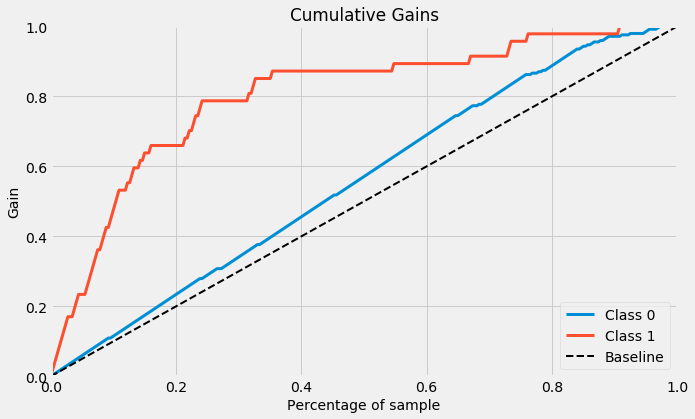

In [53]:
skplt.metrics.plot_cumulative_gain(y_test, log_clf_all.predict_proba(X_test),
                                   title='Cumulative Gains', figsize=(10, 6)
                                  )
plt.show();

__A lift curve__ shows the ratio of a model to a random guess ('model cumulative sum' / 'random guess' from above).  

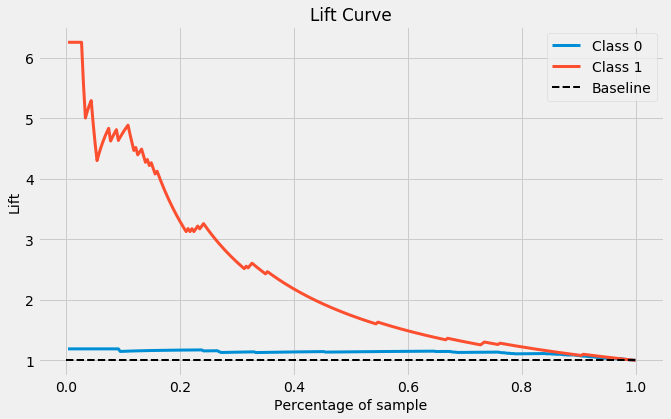

In [54]:
skplt.metrics.plot_lift_curve(y_test, log_clf_all.predict_proba(X_test), 
                              title='Lift Curve', figsize=(10, 6))
plt.legend(loc='best')
plt.show();

__Example: Benefit of using model__

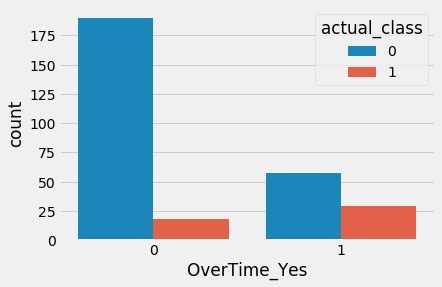

In [55]:
sns.countplot(x='OverTime_Yes',
             hue='actual_class',
             data=merge_test_df)

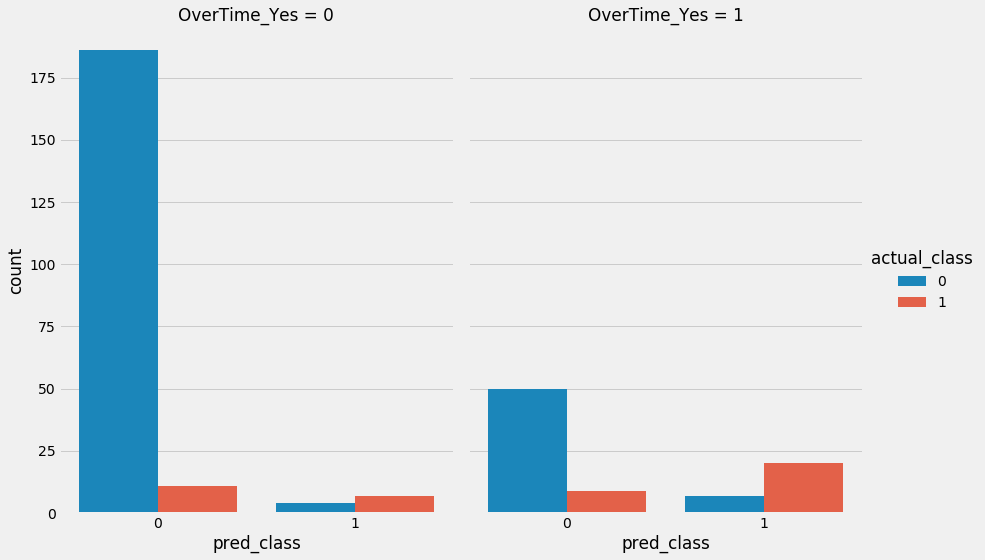

In [56]:
g = sns.catplot(x="pred_class",
                hue="actual_class", col="OverTime_Yes", col_wrap=2,
                data=merge_test_df, kind="count", 
                height=8, aspect=0.75)

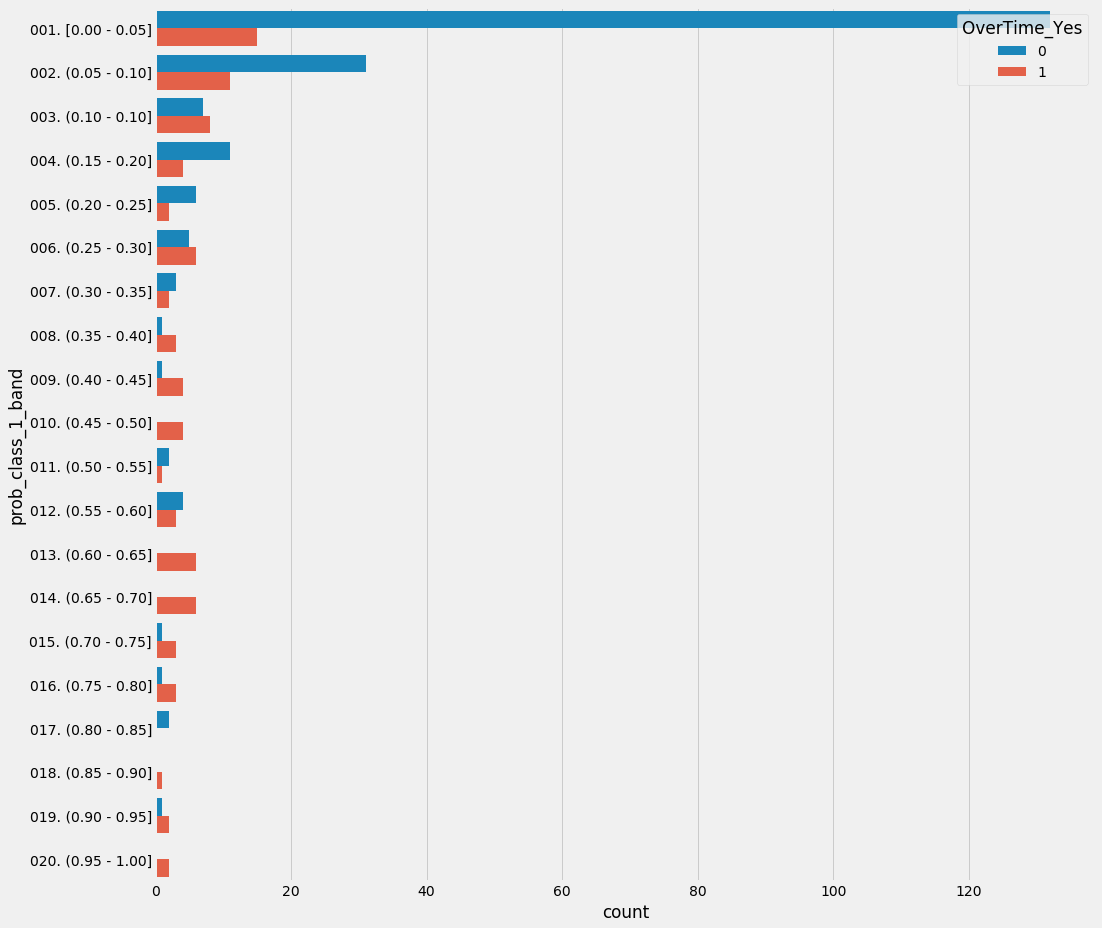

In [57]:
plt.figure(figsize=(15, 15))
sns.countplot(y='prob_class_1_band',
              hue='OverTime_Yes', 
              order=np.sort(merge_test_df.prob_class_1_band.unique()),
              data=merge_test_df)
plt.show();

#### Final Thoughts and Summary

- Each algorithm provides different pros and cons, sometimes it is best to do experiment.
- Simple model will work (most of the time).
- Choose the __proper__ evaluation metric for the model is the key in building model.
- Data collection and quality is the key for doing data science.
- Domain expert will significantly add value to the model in Feature Engineering phase.